In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data_folder = '/home/nao/bilhr23ss/workspace/src/tutorial_3/datasets/'

dataset = np.loadtxt(data_folder + 'data.txt')
X_train = dataset[:,:2]
Y_train = dataset[:,2:]

<IPython.core.display.Javascript object>


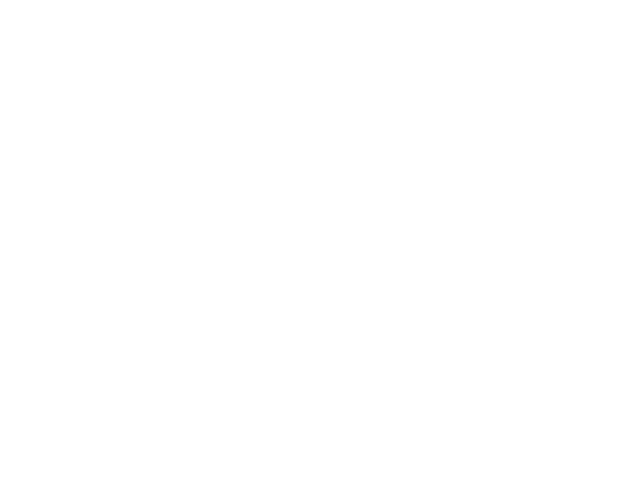

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(X_train[:,0],'r')
plt.plot(Y_train[:,1],'b')
plt.show()

<IPython.core.display.Javascript object>


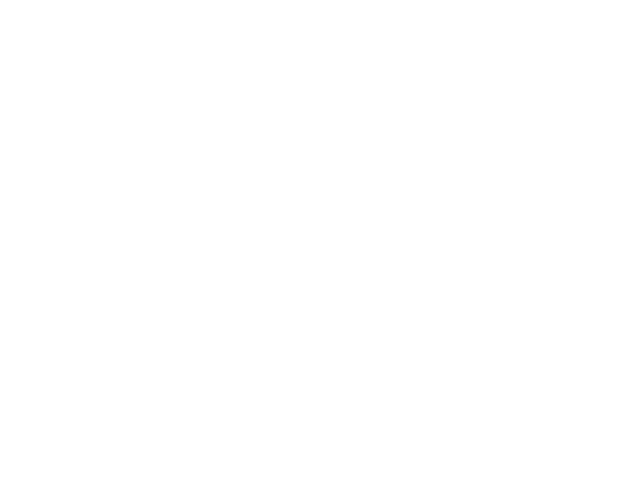

In [8]:
plt.figure()
plt.plot(X_train[:,1],'r')
plt.plot(Y_train[:,0],'b')
plt.show()

In [9]:
def init(x,y):
    
    layer=np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
l1=init(2,128)
l2=init(128,2)

In [10]:
#Sigmoid funstion
def sigmoid(x):
    return 1/(np.exp(-x)+1)    

#derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

In [11]:
#Softmax
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [12]:
#forward and backward pass
def forward_backward_pass(x,y):
    targets = y
 
    
    x_l1=x.dot(l1)
    x_sigmoid=sigmoid(x_l1)
    x_l2=x_sigmoid.dot(l2)
    out=x_l2
   
 
    error=2*(out-targets)/out.shape[0]
    update_l2=np.matmul(x_sigmoid.T,error)
    
    
    error=((l2).dot(error.T)).T*d_sigmoid(x_l1)
    update_l1=np.matmul(x.T,error)

    return out,update_l1,update_l2 

In [13]:
#forward and backward pass
def forward_pass(x):
    
    x_l1 = x.dot(l1)
    x_sigmoid = sigmoid(x_l1)
    x_l2 = x_sigmoid.dot(l2)
    out = x_l2
   
    return out

In [14]:
epochs = 200
lr = 0.01
batch = 12

losses,accuracies,val_accuracies=[],[],[]

for i in range(epochs):
    sample=np.random.randint(0,X_train.shape[0],size=(batch))
    x=X_train[sample]
    y=Y_train[sample]
 

    out,update_l1,update_l2=forward_backward_pass(x,y)
  
    #category=np.argmax(out,axis=1)
    accuracy=((out-y)/y).mean()
    accuracies.append(accuracy)
    
    loss=((out-y)**2).mean()
    losses.append(loss.item())
    
    l1=l1-lr*update_l1
    l2=l2-lr*update_l2
    
#    if(i%2==0):    
#        X_val=X_val.reshape((-1,28*28))
#        val_out=np.argmax(softmax(sigmoid(X_val.dot(l1)).dot(l2)),axis=1)
#        val_acc=(val_out==Y_val).mean()
#        val_accuracies.append(val_acc.item())
    if(i%10==0): print('For %dth epoch: train error: %.3f ' % (i, accuracy))

For 0th epoch: train error: -0.752 
For 10th epoch: train error: -0.114 
For 20th epoch: train error: 0.341 
For 30th epoch: train error: 4.746 
For 40th epoch: train error: 0.751 
For 50th epoch: train error: 0.309 
For 60th epoch: train error: 0.144 
For 70th epoch: train error: 0.396 
For 80th epoch: train error: 0.429 
For 90th epoch: train error: 0.138 
For 100th epoch: train error: 0.219 
For 110th epoch: train error: 0.742 
For 120th epoch: train error: 0.801 
For 130th epoch: train error: 0.651 
For 140th epoch: train error: 0.895 
For 150th epoch: train error: 0.165 
For 160th epoch: train error: 2.544 
For 170th epoch: train error: 0.415 
For 180th epoch: train error: 4.674 
For 190th epoch: train error: 0.292 


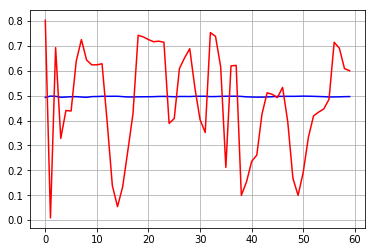

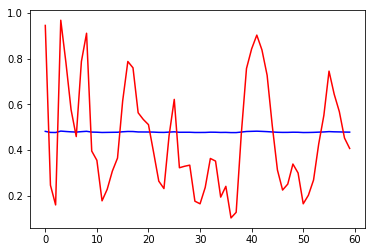

In [15]:
#print(X_train[9])
#print(Y_train[9])
%matplotlib inline
output = forward_pass(X_train[9])
x = np.arange(0,60,1)

#print(output)

fig, ax = plt.subplots()
ax.plot(x, forward_pass(X_train)[:,0], 'b')
ax.plot(x, Y_train[:,0], 'r')

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

fig, ax = plt.subplots()
ax.plot(x, forward_pass(X_train)[:,1], 'b')
ax.plot(x, Y_train[:,1], 'r')

#fig.savefig("test.png")
plt.show()


#plt.figure()
#plt.plot(Y_train[:,1],'r')
#plt.plot(forward_pass(X_train)[:,1], x,'b')
#plt.show()

In [16]:
print(l1.shape)
print(l2.shape)

(2, 128)
(128, 2)


In [17]:
with open('/home/nao/bilhr23ss/workspace/src/tutorial_3/datasets/weights-l1.txt', 'w') as f:
    for line in l1:
        for value in line:
            f.write(str(value)+' ')
        f.write('\n') 
    f.close()

In [18]:
with open('/home/nao/bilhr23ss/workspace/src/tutorial_3/datasets/weights-l2.txt', 'w') as f:
    for line in l2:
        for value in line:
            f.write(str(value)+' ')
        f.write('\n') 
    f.close() 